# Week of Oct 21 HW

## Question 1

### Simple Linear Regression (SLR) Model Explanation
The Simple Linear Regression model is expressed as:

𝑌 = $\beta_0$ + $\beta_1$𝑋 + 𝜖

where:

- 𝑌 is the outcome (dependent) variable.
- 𝑋 is the predictor (independent) variable.
- $\beta_0$ is the intercept coefficient, representing the predicted value of 𝑌 when 𝑋 = 0
- $\beta_1$ is the slope coefficient, representing the change in 𝑌 for a one-unit increase in 𝑋
- 𝜖 is the error term, representing the random noise around the linear relationship between 𝑋 and 𝑌. This error term is typically assumed to follow a normal distribution with mean 0 and some standard deviation 
𝜎, or 𝜖 ∼ 𝑁 (0, 𝜎^2)

In this model, the relationship between 𝑋 and 𝑌 is deterministic with the addition of some random noise (𝜖), which accounts for variability in the data points around the "true" linear line, defined by $\beta_0$ + $\beta_1$𝑋. The error term results in 𝑌 values that, while centered around this line, vary due to the normal distribution of errors.

### Code Implementation
Below is Python code that:

1. Creates a predictor variable 𝑋 from a uniform distribution.
2. Defines slope and intercept coefficients $\beta_0$ and $\beta_1$.
3. Generates error terms from a normal distribution.
4. Computes 𝑌 values from the model.
5. Visualizes the data points and the theoretical regression line using plotly.graph_objects.


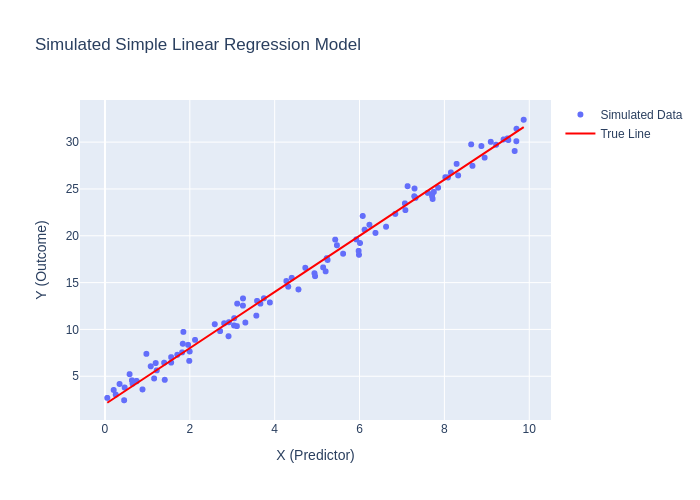

In [4]:
import numpy as np
from scipy.stats import uniform, norm
import plotly.graph_objects as go

# Parameters
n = 100  # Number of samples
beta0 = 2  # Intercept
beta1 = 3  # Slope
sigma = 1  # Standard deviation of the error term

# Generate predictor variable X
np.random.seed(42)
X = uniform.rvs(loc=0, scale=10, size=n)

# Generate error terms (epsilon)
errors = norm.rvs(loc=0, scale=sigma, size=n)

# Calculate outcome variable Y
Y = beta0 + beta1 * X + errors

# Theoretical regression line (without errors)
Y_line = beta0 + beta1 * X

# Plot
fig = go.Figure()
# Scatter plot of the simulated data points
fig.add_trace(go.Scatter(x=X, y=Y, mode='markers', name='Simulated Data'))
# Line plot of the theoretical regression line
fig.add_trace(go.Scatter(x=X, y=Y_line, mode='lines', name='True Line', line=dict(color='red')))

# Layout settings
fig.update_layout(
    title='Simulated Simple Linear Regression Model',
    xaxis_title='X (Predictor)',
    yaxis_title='Y (Outcome)',
    showlegend=True
)

fig.show(renderer="png")

### Interpretation In this plot:

- The red line represents the theoretical relationship between 𝑋 and 𝑌 defined by 𝛽0 and 𝛽1 (i.e., 𝑌 = $\beta_0$ + $\beta_1$𝑋).
- The scatter points represent the simulated data points around this line, showing how the error term (𝜖) affects the outcome values 𝑌. These points are scattered around the line, demonstrating the normal variability (with standard deviation 𝜎) added by the error term.

This illustrates the SLR model as a combination of a deterministic linear relationship with added rand

**[Link to the ChatBot Session](https://chatgpt.com/share/671be6f6-87d0-800e-a68a-57c12601c5fe)**

**Summary of the ChatBot Session**
Here's a summary of our exchanges in this session:

Initial Greeting: You said hello, and I responded with a friendly greeting.

Explanation of the Simple Linear Regression Model: You asked for a concise, theoretical explanation of the Simple Linear Regression model. I provided an overview of its components:

𝑌= 
𝛽
0
+
𝛽
1
𝑋
+
𝜖
Y=β 
0
​
 +β 
1
​
 X+ϵ, where 
𝑌
Y is the outcome variable, 
𝑋
X the predictor, 
𝛽
0
β 
0
​
  the intercept, 
𝛽
1
β 
1
​
  the slope, and 
𝜖
ϵ the error term.
I explained how these components form a sample from a normal distribution by combining the deterministic linear relationship 
𝛽
0
+
𝛽
1
𝑋
β 
0
​
 +β 
1
​
 X with random error terms, assumed to follow 
𝑁
(
0
,
𝜎
2
)
N(0,σ 
2
 ).
Python Code Demonstration: I shared Python code using numpy, scipy.stats, and plotly.graph_objects that:

Set up parameters (sample size 
𝑛
n, intercept 
𝛽
0
β 
0
​
 , slope 
𝛽
1
β 
1
​
 , and standard deviation 
𝜎
σ of error terms).
Generated predictor values from a uniform distribution, error terms from a normal distribution, and calculated 
𝑌
Y based on the SLR equation.
Visualized the theoretical regression line and the simulated data points scattered around it.
Interpretation of Visualization: I described the plot, explaining that the red line represents the theoretical linear relationship and the scatter points show the effect of random noise on 
𝑌
Y, highlighting the concept of variability around a theoretical model line in SLR.

Let me know if you'd like any adjustments or further details on any specific point!

## Question 2

### Step-by-Step Breakdown
### Step 1: Importing Required Libraries

In [9]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf  # used for specifying and fitting statistical models
import plotly.express as px  # this is a plotting library

- `statsmodels.formula.api` (aliased as `smf`) allows us to define statistical models using formulas (e.g., "`Y ~ x`") and fit these models.
- `plotly.express` (aliased as `px`) is a plotting library that provides a simple syntax for creating interactive visualizations, like scatter plots, with built-in options for adding trendlines.

In [10]:
# Simulating data for Simple Linear Regression
np.random.seed(0)  # for reproducibility
x = np.random.normal(0, 1, 100)  # simulate 100 x values from a normal distribution
Y = 3 * x + np.random.normal(0, 1, 100)  # create Y as a linear function of x with added noise

# Combine x and Y into a pandas DataFrame named df
df = pd.DataFrame({"x": x, "Y": Y})


### Step 2: Simulate Data

In [11]:
# Simulating data for Simple Linear Regression
np.random.seed(0)  # for reproducibility
x = np.random.normal(0, 1, 100)  # simulate 100 x values from a normal distribution
Y = 3 * x + np.random.normal(0, 1, 100)  # create Y as a linear function of x with added noise

# Combine x and Y into a pandas DataFrame named df
df = pd.DataFrame({"x": x, "Y": Y})


### Step 3: Specify and Fit the Model

In [12]:
model_data_specification = smf.ols("Y ~ x", data=df)  # Defines the model, specifying 'Y' as dependent and 'x' as independent
fitted_model = model_data_specification.fit()  # Fits the model to data


**Explanation:**
- `smf.ols("Y ~ x", data=df)`: Defines an Ordinary Least Squares (OLS) regression model with `Y` as the dependent variable and `x` as the independent variable.
- `fitted_model = model_data_specification.fit()`: Fits the OLS model to the data and stores the result in `fitted_model`.

### Step 4: Interpret the Model Results

In [13]:
fitted_model.summary()  # Provides a detailed summary of the fitted model, including coefficients, R-squared, etc.
fitted_model.summary().tables[1]  # Shows a table specifically listing the coefficients, standard errors, and p-values
fitted_model.params  # Provides the estimated model parameters (intercept and slope)
fitted_model.params.values  # Extracts the values of the model parameters as a NumPy array
fitted_model.rsquared  # Provides the R-squared value, indicating how well the model explains the variance in Y


0.9031189274088611

**Explanation:**
- `fitted_model.summary()`: Returns a detailed report of the regression results, including coefficients, R-squared, p-values, and diagnostics.
- `fitted_model.summary().tables[1]`: Displays only the coefficients and statistical values in a table (useful for reviewing parameter significance).
- `fitted_model.params`: Returns a series with the model’s estimated parameters (e.g., intercept and slope).
- `fitted_model.params.values`: Provides the parameter values as a NumPy array, which can be easier to work with for calculations.
- `fitted_model.rsquared`: R-squared value shows the proportion of variance in `Y` explained by `x`, where values closer to 1 indicate a better fit.

### Step 5: Plot the Data and Fitted Line

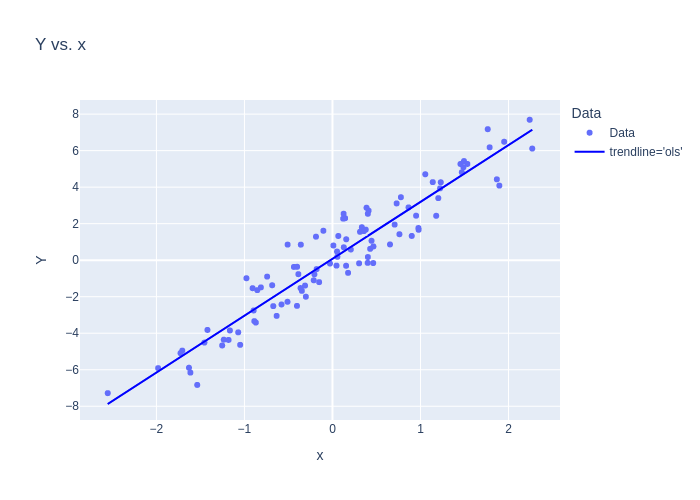

In [14]:
# Adding a label for legend consistency
df['Data'] = 'Data'  # hack to add data to legend 

# Create scatter plot with OLS trendline
fig = px.scatter(df, x='x', y='Y', color='Data', trendline='ols', title='Y vs. x')

# Manually add the fitted line (optional but demonstrates direct control over trendline appearance)
fig.add_scatter(x=df['x'], y=fitted_model.fittedvalues,
                line=dict(color='blue'), name="trendline='ols'")

fig.show(renderer="png")  # For GitHub and MarkUs submissions


**Explanation:**
- `df['Data'] = 'Data'`: Creates a dummy variable for consistent labeling in the legend.
- `trendline='ols'`: Automatically adds an OLS trendline to the scatter plot, fitting `Y` on `x`.
- `fig.add_scatter(x=df['x'], y=fitted_model.fittedvalues, ...)`: Manually adds the fitted regression line to the plot (optional here, but useful for customization).

**[Link to the ChatBot Session](https://chatgpt.com/share/671beb4a-d9c0-800e-9c16-4f63cbce6e03)**

**Summary of the ChatBot Session**
Here's a summary of our interaction in this session:

Question and Code Structure: You shared a question involving the creation and visualization of a fitted Simple Linear Regression model using simulated data in Python. The task specified using pandas and statsmodels.formula.api as smf, with comments on specific steps to clarify.

Step-by-Step Walkthrough:

Imports: We imported statsmodels.formula.api as smf for specifying and fitting statistical models, and plotly.express as px for plotting.
Data Simulation: Using numpy, we simulated data for x and created Y based on a linear relationship with x plus random noise. We combined x and Y into a DataFrame named df.
Model Specification and Fitting: We defined an Ordinary Least Squares (OLS) model with Y as the dependent variable and x as the independent variable, then fitted the model using .fit().
Model Output Interpretation: We used various methods (.summary(), .params, .rsquared) to interpret the model output, each providing details on model fit, coefficients, and explanatory power.
Visualization: We added a scatter plot using plotly.express with an automatic OLS trendline and also manually added the fitted line to demonstrate control over the trendline.
Clarifications for Each Code Line: Each code section was explained, including importing libraries, creating the DataFrame, fitting the model, interpreting output, and plotting.

This summary covers our session's key steps and explanations regarding setting up and visualizing a Simple Linear Regression model in Python.

## Question 3

To effectively address this question, let's break down the components involved in your simulation and visualization code. The goal is to compare two lines on the graph: the trendline created by the `trendline='ols'` method and the line derived from your theoretical model.

### Key Components
1. **Trendline from Ordinary Least Squares (OLS):**

This line is computed from the actual data points in your dataset. The OLS method finds the line that best fits your data by minimizing the sum of the squares of the vertical distances of the points from the line. This trendline captures the relationship between your independent variable (x) and your dependent variable (y) based on the observed data.

2. **Theoretical Line:**

The line you add using the beta0 + beta1 * x_range equation represents a theoretical relationship derived from a specified model (where beta0 is the y-intercept and beta1 is the slope). This line does not consider the actual data and instead demonstrates a hypothetical relationship.

### Combined Code Explanation
Here’s a brief overview of how the combined code visualizes these two lines:

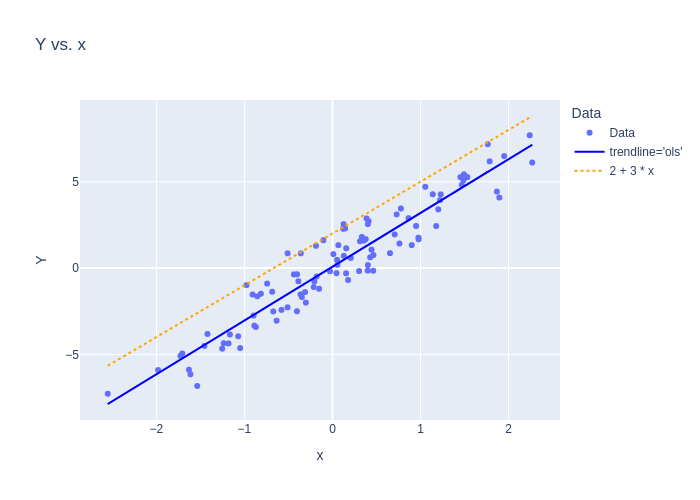

In [15]:
# Assume df is your DataFrame with 'x' and 'y' values
x_range = np.array([df['x'].min(), df['x'].max()])
# beta0 and beta1 should be previously defined from your theoretical model
y_line = beta0 + beta1 * x_range

fig.add_scatter(x=x_range, y=y_line, mode='lines',
                name=str(beta0) + ' + ' + str(beta1) + ' * x', 
                line=dict(dash='dot', color='orange'))

fig.show(renderer="png")


### Nature of the Two Lines
- **OLS Trendline (Solid Line):**
    - **Nature:** Reflects empirical data. It adapts to the variations and patterns present in the dataset, showing the average trend observed in the sample.
    - **Purpose:** Provides insight into how well the theoretical model might align with the actual observations.
- **Theoretical Line (Dashed Line):**
    - **Nature:** Represents a model based on assumptions about the relationship between x and y, independent of actual data. It is constant across simulations and demonstrates the expected outcome if the assumptions were true.
    - **Purpose:** Acts as a benchmark or reference, allowing you to evaluate how closely the empirical data (OLS line) fits this theoretical expectation.

### Overall Purpose of the Comparison
The primary aim of visualizing both lines together is to assess how well the theoretical model approximates the empirical data. By simulating random sampling variations, you can see how changes in the data influence the OLS trendline while the theoretical line remains constant.

### Simulation Insights
By repeatedly running your simulations:
- You can observe how the OLS line shifts and changes its slope with different datasets.
- This variability demonstrates the randomness inherent in sampling and reinforces the importance of considering empirical evidence when evaluating theoretical models.

In conclusion, comparing these lines illustrates the dynamic nature of real-world data against the static assumptions of a theoretical model, emphasizing the importance of simulation in understanding variability and model accuracy.

**[Link to the ChatBot Session](https://chatgpt.com/share/671bec84-51e4-800e-9046-9b7e2f2f2e5e)**

**Summary of the ChatBot Session**
Here’s a summary of our exchanges in this session:

Task Overview: You asked for guidance on combining code from two questions regarding a simulation of random sampling variation and the nature of the lines represented in a graphical visualization.

Key Components: I explained the distinction between two lines in the graph:

OLS Trendline: This line reflects empirical data and represents the best fit for the observed data using Ordinary Least Squares (OLS) regression.
Theoretical Line: This line, derived from a specified model (using coefficients beta0 and beta1), serves as a reference that does not change with the dataset and represents an expected relationship.
Combined Code Explanation: I provided an overview of the code you shared, which adds the theoretical line to the figure and discussed how this visualization helps in understanding the relationship between the theoretical model and the empirical data.

Nature of the Two Lines: I summarized the differences in the nature and purpose of the OLS trendline and the theoretical line, highlighting how the OLS line adapts to data variations while the theoretical line remains constant.

Overall Purpose of Comparison: I concluded with the purpose of comparing these lines, emphasizing the importance of simulation in understanding data variability and model accuracy.

This summary captures the essence of our interaction focused on your homework assignment regarding data simulation and visualization. Let me know if you need anything else!

## Question 4

To understand how `fitted_model.fittedvalues` are derived in the context of a fitted Simple Linear Regression model, we can break down the components involved, particularly in relation to `fitted_model.summary().tables[1]`, which provides a summary of the regression parameters.

### 1. Understanding the Simple Linear Regression Model
In a simple linear regression, the relationship between the independent variable 𝑋 and the dependent variable 𝑌 is modeled as:
𝑌 = $\beta_0$ + $\beta_1$𝑋 + 𝜖
where： 
- 𝑌 is the dependent variable (response). 
- 𝑋 is the independent variable (predictor).
- $\beta_0$ is the intercept. 
- $\beta_1$ is the slope (coefficient of 𝑋). 
- 𝜖 is the error term (the difference between the observed and predicted values).

### 2. Fitting the Model
When you fit a linear regression model using a library like `statsmodels`, it estimates the parameters $\beta_0$ and $\beta_1$ based on the provided data. These estimates are found using the method of least squares, which minimizes the sum of the squared residuals (the differences between observed and predicted values).

### 3. Accessing Parameters in the Fitted Model
After fitting the model, you can access the estimated coefficients through:

In [16]:
fitted_model.params

Intercept    0.075153
x            3.114698
dtype: float64

**or directly as:**

In [17]:
fitted_model.params.values

array([0.07515309, 3.11469843])

- `fitted_model.params` will provide you with a Pandas Series containing the estimated coefficients:
    - 𝛽0 (intercept)
    - 𝛽1(slope)

### 4. Generating Fitted Values
The fitted values (predicted values of 𝑌 based on the model) are computed using the estimated parameters:
$\hat{Y}$ = $\hat{\beta}_0$ + $\hat{\beta}_1$X

Where:
- $\hat{Y}$ represents the fitted (predicted) values.
- $\hat{\beta}_0$ and $\hat{\beta}_1$ are the estimated parameters obtained from `fitted_model.params`.

In Python, this can be computed directly from the model as follows:

In [18]:
fitted_values = fitted_model.fittedvalues

### 5. Summary Table and Fitted Values
When you view the summary of the fitted model:

In [19]:
fitted_model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,0.0752,0.104,0.722,0.472,-0.131,0.282
x,3.1147,0.103,30.225,0.000,2.910,3.319


This provides a detailed table with the estimated coefficients, their standard errors, t-statistics, and p-values. The values in the `params` field correspond to the coefficients you use to calculate the fitted values.

**[Link to the ChatBot Session](https://chatgpt.com/share/671bf069-c144-800e-a115-fcb35211531e)**

**Summary of the ChatBot Session**
Here’s a summary of our exchanges in this session:

Question on Fitted Model Values: You asked for an explanation of how fitted_model.fittedvalues are derived based on fitted_model.summary().tables[1] or more specifically fitted_model.params. You wanted to illustrate how in-sample predictions of the fitted Simple Linear Regression model are made compared to the theoretical model.

Markdown Formatting Queries:

You inquired about how to type 
𝑌
^
Y
^
  (Y hat) in Markdown.
You also asked how to type 
𝛽
^
0
β
^
​
  
0
​
  (beta hat with a subscript of 0) in Markdown.
Finally, you asked how to type 
𝛽
0
β 
0
​
  (beta with a subscript of 0) in Markdown.
Each response provided the necessary Markdown syntax and example usage for rendering the mathematical expressions correctly.

## Question 5

In the context of the "ordinary least squares" (OLS) method for fitting a regression model, the line chosen is the one that minimizes the sum of the squared residuals, which are the differences between the observed values (actual data points) and the values predicted by the model.

### Explanation of OLS and Residuals:
1. **Residuals**: In this scenario, residuals are the vertical distances between each data point (Y) and the corresponding predicted value from the fitted model (fitted values). They are calculated as:
Residual = $Y_{\text{observed}}$ − $Y_{\text{predicted}}$
These residuals represent how far off the model's predictions are from the actual data points.

2. **Minimizing Squares**: The reason OLS uses "squares" is to ensure that larger discrepancies between predicted and observed values have a disproportionately larger impact on the model. By squaring the residuals, OLS:
    - **Eliminates Negative Values**: Squaring transforms all residuals into positive values, which ensures that positive and negative errors do not cancel each other out.
    - **Emphasizes Larger Errors**: Squaring emphasizes larger residuals more than smaller ones, thereby encouraging the model to focus on correcting the most significant errors.

3. **Chosen Line**: The fitted line represents the best linear approximation of the relationship between the independent variable (X) and the dependent variable (Y) according to the data. The OLS method results in a straight line that minimizes the total squared distance of all residuals, effectively leading to a model that fits the observed data as closely as possible.

In summary, the OLS method determines the best-fit line by minimizing the sum of the squares of the residuals, leading to a model that provides the closest predictions to the actual data points while ensuring that larger errors are prioritized in the fitting process.

**[Link to the ChatBot Session](https://chatgpt.com/share/671bf1ab-3580-800e-a400-9c96727ee345)**

**Summary of the ChatBot Session**
Here’s a summary of our exchanges in this session:

Question on Ordinary Least Squares (OLS): You asked for a concise explanation of how the line chosen for the fitted model based on observed data using the "ordinary least squares" (OLS) method works and why it requires "squares." You specifically requested that the explanation focus on residuals rather than the mathematical equations.

Explanation Provided: I explained that OLS minimizes the sum of the squared residuals, which are the differences between observed values and predicted values from the fitted model. I detailed how residuals are calculated, the importance of squaring them to eliminate negative values and emphasize larger errors, and how this process leads to the best linear approximation of the relationship between independent and dependent variables.

Subscript Formatting: You asked how to type 
𝑌
Y with a subscript of "observed." I provided the LaTeX syntax for this notation, 
𝑌
observed
Y 
observed
​
 , and explained how to use it in Markdown environments that support LaTeX.

Let me know if you need any further details!

## Question 6

### Explaining R-squared and Related Expressions in Simple Linear Regression

*   The expression `1-((Y-fitted_model.fittedvalues)**2).sum()/((Y-Y.mean())**2).sum()` calculates the **proportion of variation in the outcome variable (Y) explained by the fitted Simple Linear Regression model.** This is the definition of **R-squared.**

*   **R-squared**, represented by `fitted_model.rsquared`, serves as a **measure of the model's accuracy**. A higher R-squared value indicates that the model explains a larger proportion of the variation in Y, suggesting a better fit to the data.

*   The expression `np.corrcoef(Y,fitted_model.fittedvalues)**2` calculates the **square of the correlation coefficient between the observed outcome values (Y) and the fitted values from the model.**  This is equivalent to **R-squared** in the context of Simple Linear Regression models.

*   The expression `np.corrcoef(Y,x)**2` calculates the **square of the correlation coefficient between the observed outcome values (Y) and the predictor variable (x)**. This represents the proportion of variation in Y explained by x alone, **without considering the Simple Linear Regression model**.

**In summary:**

*   The first expression is a direct calculation of **R-squared**, indicating the proportion of variation in Y explained by the model.
*   `fitted_model.rsquared` is a convenient way to access the calculated R-squared value.
*   The two `np.corrcoef(...)**2` expressions relate to the correlation between Y and the fitted values, and between Y and x, respectively.

**Key Concept: Variation Explained**

The concept of "variation explained" is central to understanding these expressions.

*   **Total Variation:** The denominator in the first expression, `((Y-Y.mean())**2).sum()`, represents the **total variation in Y around its mean.** This is the baseline against which the model's explanatory power is measured.
*   **Unexplained Variation:** The numerator, `((Y-fitted_model.fittedvalues)**2).sum()`, represents the **variation in Y that remains unexplained by the model**. It is the sum of squared differences between the observed Y values and the model's fitted values (residuals).
*   **Proportion Explained:**  **R-squared** is calculated by subtracting the proportion of unexplained variation from 1. This gives the **proportion of the total variation in Y that is accounted for by the model**.

The visualization mentioned in the "Further Guidance" likely illustrated the relationship between total variation, unexplained variation, and the fitted line.  It likely showed how the squared distances between Y values and the mean (total variation) compare to the squared distances between Y values and the fitted line (unexplained variation). 


**I used NotebookLM for this question so there is no chat session link**

**ChatBot Summary**
### Summary of Chatbot Interactions for Homework Submission

You asked for an explanation of why the expression `1-((Y-fitted_model.fittedvalues)**2).sum()/((Y-Y.mean())**2).sum()` represents the proportion of variation in the outcome variable (Y) explained by the fitted Simple Linear Regression model. You also asked for clarification on why `fitted_model.rsquared` is a measure of the model's accuracy and what the expressions  `np.corrcoef(Y,fitted_model.fittedvalues)**2` and `np.corrcoef(Y,x)**2` capture in the context of Simple Linear Regression models. 

The response explained that:

*   The expression `1-((Y-fitted_model.fittedvalues)**2).sum()/((Y-Y.mean())**2).sum()` is the formula for **R-squared**, which quantifies the proportion of variation in the outcome variable (Y) that the fitted Simple Linear Regression model can explain. 
*   A higher **R-squared** value, obtained through `fitted_model.rsquared`, indicates a better fit of the model to the data, meaning the model accounts for more of the variability in Y.
*   `np.corrcoef(Y,fitted_model.fittedvalues)**2` is another way to calculate **R-squared** specific to Simple Linear Regression. It represents the square of the correlation coefficient between the actual outcome values (Y) and the values predicted by the model (fitted values).
*   On the other hand, `np.corrcoef(Y,x)**2` calculates the square of the correlation coefficient between the outcome (Y) and the predictor variable (x) alone. This quantifies the proportion of Y's variation explained by x itself, without considering the Simple Linear Regression model.

The response emphasized the idea of "**variation explained**" as key to understanding these concepts. It broke down the calculation of R-squared: 

*   The denominator, `((Y-Y.mean())**2).sum()`, represents the total variation in Y around its mean, serving as the baseline.
*   The numerator, `((Y-fitted_model.fittedvalues)**2).sum()`, is the variation in Y that the model doesn't explain (sum of squared differences between actual Y values and the model's predicted values).
*   **R-squared** is determined by subtracting the proportion of unexplained variation from 1, resulting in the proportion of Y's total variation that the model accounts for.

The response noted that a visualization demonstrating the connection between total variation, unexplained variation, and the fitted line might show how the squared distances of the Y values from the mean (total variation) compare to the squared distances of the Y values from the fitted line (unexplained variation). The sources provide code snippets and explanations that illustrate these concepts, and encourage using visualizations and simulations for a better understanding of **Simple Linear Regression**. 

The instructions for the homework assignment require summaries of all Chatbot sessions, including links to chat log histories when using ChatGPT. These summaries should be organized and pasted into your homework notebook. Remember that using Chatbots should be for enhancing your understanding and not for having the Chatbot "do the work for you".  Focus on building your understanding so that you can effectively utilize Chatbots and other resources for improved efficiency in your work.


## Question 7

When using Simple Linear Regression (SLR), several assumptions must be met for the model to be valid. Here are a couple of assumptions that may not be compatible with your provided dataset regarding the relationship between the amount of fertilizer used and crop yield:

### 1. Linearity
- **Assumption**: The relationship between the independent variable (amount of fertilizer) and the dependent variable (crop yield) should be linear.
- **Potential Issue**: In your dataset, the crop yield does not seem to increase linearly with the amount of fertilizer. For instance, the crop yield shows a significant increase at certain fertilizer levels (like from 1.8 kg to 2.0 kg) but does not consistently show this pattern for every increment in fertilizer. This non-linear pattern could indicate that a linear model might not capture the true relationship effectively. A scatter plot might reveal that the data could be better modeled by a polynomial or non-linear regression.

### 2. Homoscedasticity
- **Assumption**: The residuals (differences between observed and predicted values) should have constant variance at all levels of the independent variable.
- **Potential Issue**: When you examine the histogram of residuals, if the variance of the residuals increases or decreases with the amount of fertilizer, this indicates a violation of the homoscedasticity assumption. For example, if residuals show a fan shape or funnel shape when plotted against the independent variable, it suggests that variability in crop yield increases with the amount of fertilizer, which can affect the validity of the model.

### Other Considerations
Here are additional assumptions worth mentioning, which could also be assessed based on the data:

- **Independence of Errors**: The residuals should be independent of each other. If there is a pattern or correlation among the residuals, this assumption is violated.
- **Normality of Residuals**: The residuals should be approximately normally distributed for valid hypothesis testing. A histogram or a Q-Q plot of the residuals can be used to check this assumption.

In summary, a careful analysis of the scatter plot and histogram of residuals will help in assessing these assumptions, which is critical for validating the results of the SLR model.

**[Link to the ChatBot Session](https://chatgpt.com/share/671bf48f-d5ec-800e-b9cf-0b4de8d35e9c)**

**Summary of the ChatBot Session**
Here’s a summary of our exchanges in this session:

Data Analysis Context: You provided a Python code snippet involving a dataset that shows the relationship between the amount of fertilizer used and crop yield. You included details about importing libraries, creating a scatter plot with a trendline, performing linear regression, predicting values, and visualizing residuals using histograms.

Discussion on Linear Regression Assumptions: You asked about the assumptions of the Simple Linear Regression model that may not be compatible with the example data. I provided an analysis highlighting two key assumptions:

Linearity: Noting that the relationship between fertilizer and crop yield might not be linear based on the data.
Homoscedasticity: Mentioning that the residuals should have constant variance across levels of fertilizer and discussing the potential implications if this assumption is violated.
Further Considerations: I also pointed out additional assumptions related to independence and normality of residuals that could be assessed based on your dataset.

# Week of Nov 4 HW

## Question 8

### Step 1: Specify the Null Hypothesis
The null hypothesis (H<sub>0</sub>
) can be stated as follows:
- The Null Hypothesis (H<sub>0</sub>
): There is no linear association between waiting time and eruption duration. This can be mathematically represented as:
H<sub>0</sub> : H<sub>1</sub> = 0
where H<sub>1</sub> is the slope coefficient of the regression line.

### Step 2: Fit the Simple Linear Regression Model
You already have the code to fit the model and generate the summary. Here’s the complete process:

In [21]:
import seaborn as sns
import statsmodels.formula.api as smf

# Load the Old Faithful Geyser dataset
old_faithful = sns.load_dataset('geyser')

# Define the linear regression model
linear_for_specification = 'duration ~ waiting'
model = smf.ols(linear_for_specification, data=old_faithful)

# Fit the model
fitted_model = model.fit()

# Print the summary
print(fitted_model.summary())


                            OLS Regression Results                            
Dep. Variable:               duration   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     1162.
Date:                Fri, 25 Oct 2024   Prob (F-statistic):          8.13e-100
Time:                        19:47:12   Log-Likelihood:                -194.51
No. Observations:                 272   AIC:                             393.0
Df Residuals:                     270   BIC:                             400.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8740      0.160    -11.702      0.0

### Step 3: Analyze the Output
1. **Identify the p-value**: In the output summary of the fitted model, look for the p-value associated with the `waiting` coefficient. This will help determine the strength of evidence against the null hypothesis.

2. **Interpret the p-value**: Based on the p-value, you can categorize the evidence:
    - **p-value > 0.05**: Fail to reject H<sub>0</sub> (no significant linear association).
    - **0.01 < p-value ≤ 0.05**: Weak evidence against H<sub>0</sub>. 
    - **0.001 < p-value ≤ 0.01**: Moderate evidence against H<sub>0</sub>.
    - **p-value ≤ 0.001**: Strong evidence against H<sub>0</sub>. 

### Example Interpretation
Assuming the output shows a p-value of 0.03, you would interpret it as follows:
- **Interpretation**: "We reject the null hypothesis with a p-value of 0.03, meaning we have weak evidence against the null hypothesis. This suggests that there is a statistically significant linear association between the waiting time and the duration of the eruptions."


**[Link to the ChatBot Session](https://chatgpt.com/share/671bf735-30ec-800e-b628-efbd55371906)**

**Summary of the ChatBot Session**
Here's a summary of our exchanges in this session:

LOWESS Trendline Code Explanation: You provided code related to the Old Faithful Geyser dataset, including creating scatter plots and trendlines using libraries like Plotly and Statsmodels.

Hypothesis Testing Guidance: You asked for help in specifying a null hypothesis of "no linear association (on average)" regarding Simple Linear Regression, including instructions on how to interpret p-values and the evidence against the null hypothesis.

Statistical Analysis Steps: I provided a structured approach for completing your analysis, including:

Stating the null hypothesis (
𝐻
0
:
𝛽
1
=
0
H 
0
​
 :β 
1
​
 =0).
Code to fit the Simple Linear Regression model and print the summary.
Instructions to analyze the summary output to identify and interpret the p-value.
Markdown Subscript Formatting: You requested guidance on how to type 
𝐻
0
H 
0
​
  in Markdown, and I explained how to create subscript text using HTML tags or LaTeX syntax.

## Question 9

To analyze the relationship between the duration of geyser eruptions and the waiting time under the condition of short wait times (less than a specified limit), you can follow these steps:

1. **Setup the Analysis**: You'll start by importing the necessary libraries and loading the Old Faithful dataset.
2. **Fit a Linear Regression Model**: For the specified short wait limits, you'll fit an ordinary least squares (OLS) regression model to assess the relationship between waiting and duration.
3. **Examine the Output**: You'll analyze the model summary to evaluate the evidence against the null hypothesis, which states that there is no relationship between the two variables.
4. **Visualize the Data**: Finally, you'll create a scatter plot with the OLS trendline to visualize the relationship.

Here's how to implement this in code:

### Step 1: Import Libraries and Load Dataset

In [22]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import statsmodels.formula.api as smf

# Load the Old Faithful Geyser dataset
old_faithful = sns.load_dataset('geyser')


### Step 2: Fit the OLS Model for Short Wait Times
You will loop through the specified short wait limits (62, 64, 66) and fit a linear regression model for each limit.

In [23]:
# Define short wait limits
short_wait_limits = [62, 64, 66]

for short_wait_limit in short_wait_limits:
    short_wait = old_faithful.waiting < short_wait_limit
    
    # Fit the OLS model
    model = smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit()
    
    # Print the summary of the model
    print(f"Results for short wait limit: {short_wait_limit} minutes")
    print(model.summary().tables[1])


Results for short wait limit: 62 minutes
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6401      0.309      5.306      0.000       1.025       2.255
waiting        0.0069      0.006      1.188      0.238      -0.005       0.019
Results for short wait limit: 64 minutes
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.4140      0.288      4.915      0.000       0.842       1.986
waiting        0.0114      0.005      2.127      0.036       0.001       0.022
Results for short wait limit: 66 minutes
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8619      0.327      2.637      0.010       0.213       1.511
waiting 

### Step 3: Analyze the Output
From the regression summary for each short wait limit, focus on the following:

- **Coefficient** for `waiting`: This indicates the strength and direction of the relationship between waiting time and duration.
- **p-value**: A low p-value (typically < 0.05) suggests that you can reject the null hypothesis and conclude that there is a significant relationship.
- **R-squared**: This value indicates how well the independent variable (waiting) explains the variability of the dependent variable (duration).

### Step 4: Visualize the Data
You can visualize the relationship with a scatter plot and the OLS trendline.

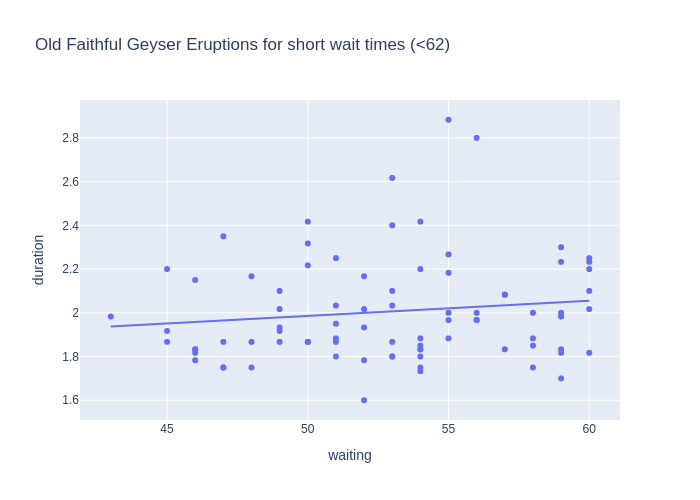

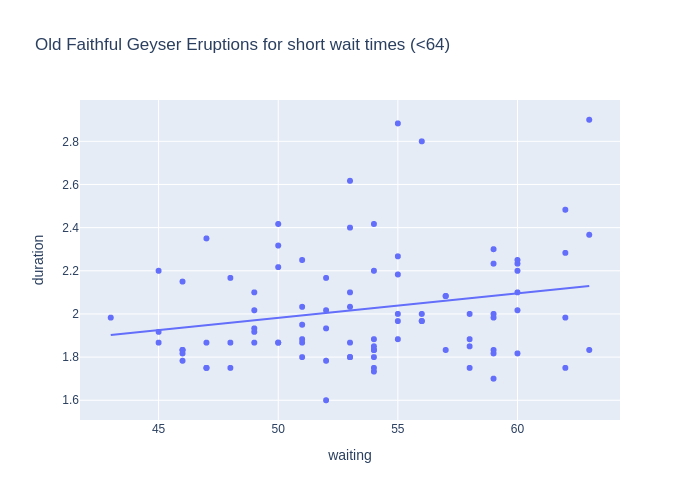

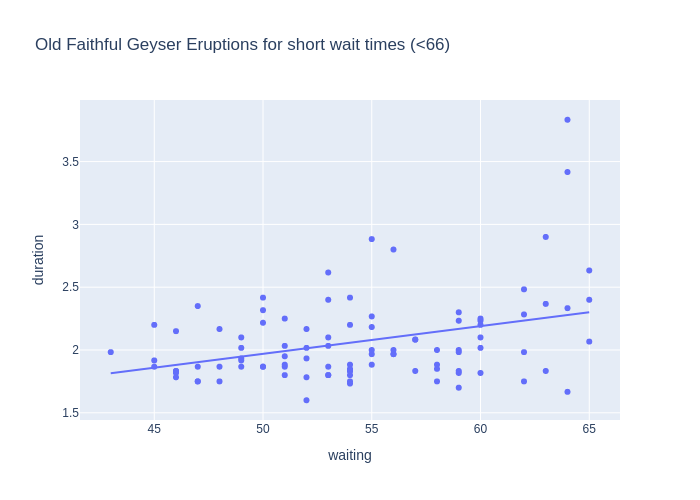

In [24]:
for short_wait_limit in short_wait_limits:
    short_wait = old_faithful.waiting < short_wait_limit
    
    # Create the scatter plot
    fig = px.scatter(old_faithful[short_wait], x='waiting', y='duration', 
                     title=f"Old Faithful Geyser Eruptions for short wait times (<{short_wait_limit})", 
                     trendline='ols')

    # Show the plot
    fig.show(renderer="png")


Here’s a breakdown of how you might analyze each limit:

**For a Short Wait Limit of 62 Minutes**
- **Coefficient**: Check if the waiting coefficient is positive and reasonably similar to the full dataset’s coefficient.
- **p-value**: If below 0.05, this provides evidence that the relationship is statistically significant.
- **R-squared**: A moderate to high R-squared value suggests that waiting still explains a good amount of the variability in duration for shorter wait times.

**For a Short Wait Limit of 64 Minutes**
- **Coefficient**: Similar to the limit of 62 minutes, the coefficient should be positive to indicate a consistent relationship.
- **p-value**: A low p-value strengthens the evidence for a statistically significant relationship.
- **R-squared**: A similar or slightly higher R-squared value compared to 62 minutes would show that the explanatory power increases as we allow slightly longer wait times.

**For a Short Wait Limit of 66 Minutes**
- **Coefficient**: Expect a positive coefficient that may be closer to the full dataset's coefficient, as we’re including more wait times closer to the overall average.
- **p-value**: A low p-value here reinforces the significance of the relationship.
- **R-squared**: This should be the highest of the three limits if the relationship becomes clearer as wait time approaches typical eruption intervals.

Interpretation
If you observe positive coefficients, low p-values, and reasonable R-squared values across all three short wait limits, this indicates a consistent relationship between wait time and eruption duration, even for shorter wait times. However, if the p-values increase or the R-squared values drop significantly for very short limits (like 62 minutes), this could imply a weaker relationship within these constraints.

**[Link to the ChatBot Session](https://chatgpt.com/share/671bf851-1100-800e-afd5-4ebb1eab27e2)**

**Summary of the ChatBot Session**
Summary of Chatbot Session:

Introduction of Analysis Task: You provided details about a homework assignment involving the Old Faithful geyser dataset. The assignment focuses on analyzing relationships using scatter plots and regression models, particularly in the context of short wait times for geyser eruptions.

Code Provided: You shared code snippets for:

Creating a scatter plot with a linear regression trendline using Plotly Express and Seaborn.
Adding a LOWESS trendline using Statsmodels.
Fitting a linear regression model to assess the relationship between eruption duration and waiting time under conditions of short wait times.
Analysis Instructions: I outlined steps for analyzing the relationship between duration and waiting:

Setting Up: Importing necessary libraries and loading the dataset.
Fitting OLS Models: Looping through specified short wait limits (62, 64, 66) and fitting OLS models to assess the relationship.
Analyzing Output: Evaluating coefficients, p-values, and R-squared values from the model summary.
Visualization: Creating scatter plots with OLS trendlines for each short wait limit.
Conclusion Guidance: I encouraged you to analyze the results, focusing on the significance of the relationships observed and noting any trends.

Summary of Chatbot Session:

Introduction of Analysis Task: You introduced a homework assignment involving the Old Faithful geyser dataset, where the goal was to analyze the relationship between geyser eruption duration and waiting time, especially for short wait times (under specific limits of 62, 64, and 66 minutes).

Evidence for Relationship Analysis: I explained how to evaluate the relationship between duration and wait time by looking at:

The OLS regression coefficient for waiting, indicating the strength and direction of the relationship.
The p-value for the waiting coefficient, assessing the statistical significance of the relationship.
The R-squared value of each model, reflecting the explanatory power of wait time on eruption duration.
Request for Specific Results: I requested specific values for each short wait limit—coefficients, p-values, and R-squared values—so that I could provide a detailed interpretation of the relationship for each subset of wait times.



## Question (10)

In [18]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
from scipy import stats
import plotly.express as px
import warnings

# Suppress the specific warning about Omni norm test with fewer than 8 observations
warnings.filterwarnings("ignore", message="omni_normtest is not valid with less than 8 observations")

# Assuming 'old_faithful' is a Pandas DataFrame with columns 'waiting' and 'duration'
long_wait_limit = 71
long_wait = old_faithful.waiting > long_wait_limit
n_long_wait = long_wait.sum()

# Part 1: Bootstrapping
n_bootstraps = 1000
bootstrapped_slope_coefficients = []
for i in range(n_bootstraps):
    bootstrap_sample = old_faithful[long_wait].sample(n=n_long_wait, replace=True)
    fitted_model = smf.ols('duration ~ waiting', data=bootstrap_sample).fit()
    bootstrapped_slope_coefficients.append(fitted_model.params.iloc[1])

bootstrapped_slope_coefficients = np.array(bootstrapped_slope_coefficients)
bootstrap_ci = np.quantile(bootstrapped_slope_coefficients, [0.025, 0.975])

# Part 2: Simulation under the Null Hypothesis
n_simulations = 1000
simulated_slope_coefficients = []
for i in range(n_simulations):
    old_faithful_simulation = old_faithful[long_wait].copy()
    old_faithful_simulation['duration'] = 1.65 + 0 * old_faithful_simulation.waiting + stats.norm(loc=0, scale=0.37).rvs(size=n_long_wait)
    fitted_model = smf.ols('duration ~ waiting', data=old_faithful_simulation).fit()
    simulated_slope_coefficients.append(fitted_model.params.iloc[1])

simulated_slope_coefficients = np.array(simulated_slope_coefficients)
observed_slope = smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().params.iloc[1]
simulated_p_value = (np.abs(simulated_slope_coefficients) >= np.abs(observed_slope)).mean()

# Part 3: Visualization
fig_bootstrap = px.histogram(x=bootstrapped_slope_coefficients, title='Bootstrapped Sampling Distribution of Slope Coefficients')
fig_bootstrap.show()

fig_simulated = px.histogram(x=simulated_slope_coefficients, title='Simulated Sampling Distribution of Slope Coefficients (Null Hypothesis)')
fig_simulated.show()

# Part 4: Reporting
print(f"95% Bootstrapped Confidence Interval: {bootstrap_ci}")
print(f"Simulated p-value: {simulated_p_value}")
print(smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().summary().tables[1])


95% Bootstrapped Confidence Interval: [-0.19        0.03940043]
Simulated p-value: 0.016
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.7519      5.673      1.719      0.184      -8.303      27.807
waiting       -0.0778      0.069     -1.129      0.341      -0.297       0.141


Let's break down the concepts of bootstrapping, simulation, and hypothesis testing in the context of simple linear regression, using the Old Faithful geyser dataset as an example.
Bootstrapping and Confidence Intervals
Bootstrapping is a resampling technique used to estimate the sampling distribution of a statistic. In this case, the statistic of interest is the slope coefficient of the fitted simple linear regression model. The basic idea is to repeatedly sample with replacement from the original dataset and fit a simple linear regression model to each bootstrap sample. This process yields a collection of bootstrapped slope coefficients, which can be used to construct a confidence interval for the true slope coefficient.
A 95% bootstrapped confidence interval is an interval that contains the true slope coefficient with 95% probability. It can be calculated by finding the 2.5th and 97.5th percentiles of the bootstrapped slope coefficients.
Simulation and Hypothesis Testing
Simulating data under a null hypothesis allows us to assess the plausibility of the null hypothesis. In this case, the null hypothesis is "no linear association (on average)" between waiting time and eruption duration. This means the true slope coefficient, $\beta_1$, is assumed to be 0.
To simulate data under this null hypothesis, we can use the following steps:
●
Fix $\beta_0= 1.65$, $\beta_1 = 0$, and $\sigma = 0.37$.
●
Use the observed waiting times ($x$) from the long wait times subset of the Old Faithful dataset.
●
Generate simulated eruption durations ($Y$) using the simple linear regression equation:
○
$Y = \beta_0 + \beta_1 x + \epsilon$, where $\epsilon$ is randomly sampled from a normal distribution with mean 0 and standard deviation $\sigma$ (stats.norm(loc=0, scale=0.37).rvs(size=long_wait.sum())).
By fitting simple linear regression models to multiple simulated datasets, we can obtain a sampling distribution of the fitted slope coefficient under the null hypothesis. This distribution reflects the variability we would expect in the slope coefficient if the null hypothesis were true.
The p-value is the probability of observing a slope coefficient as extreme as the one observed in the original data, assuming the null hypothesis is true. It can be estimated by calculating the proportion of simulated slope coefficients that are as extreme as or more extreme than the slope coefficient obtained from the original long wait times data.
Comparing the Results
●
If 0 is contained within the 95% bootstrapped confidence interval, we would fail to reject the null hypothesis. This means there is insufficient evidence to conclude that there is a linear association between waiting time and eruption duration for long wait times.
●
If the simulated p-value matches the p-value reported by smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().summary().tables, it provides further support for the conclusions drawn from the bootstrapped confidence interval. A small p-value would indicate strong evidence against the null hypothesis, suggesting a linear association exists.

Key Corrections and Points
●
Use of .iloc: As discussed in our conversation history, the error you encountered was due to trying to access the slope coefficient using an incorrect index in fitted_model.params. By using .iloc, we correctly select the slope coefficient, which is typically the second element (index 1) in the params Series.
●
Looping and Appending: In both the bootstrapping and simulation sections, a for loop is used to repeatedly generate samples and fit models. Within each loop iteration, the calculated slope coefficient (fitted_model.params.iloc) is appended to the respective list (bootstrapped_slope_coefficients or simulated_slope_coefficients).
This code provides a framework for analyzing the relationship between waiting time and eruption duration in the Old Faithful geyser dataset using bootstrapping and simulation under a null hypothesis. Keep in mind that the specific values for $\beta_0$, $\beta_1$, and $\sigma$ may need to be adjusted based on your analysis and the characteristics of your data. The provided code should be considered a template and may require further customization based on the nuances of your specific analysis and dataset.

**I used NotebookLM for this question so there is not link to the chat session**

**Summary of the ChatBot Session**

The user presented a Python code snippet intended to generate bootstrapped and simulated sampling distributions of fitted slope coefficients for simple linear regression. The code aimed to analyze the Old Faithful geyser dataset. The user was encountering an `IndexError` indicating an out-of-bounds index access in the `fitted_model.params` Series during the bootstrapping process.

Upon reviewing the code, it was determined that the error stemmed from treating the index as a position while accessing the slope coefficient. To rectify this, it was recommended to use `.iloc[]` for accessing elements by position within the Series. This approach aligns with best practices and ensures forward compatibility with future Pandas versions, as directly using integer keys for positional access in Series will be deprecated.

The user then requested the corrected code. In response, a corrected and expanded Python code was provided. The corrected code incorporates the use of `.iloc[]` for accurate coefficient retrieval. It includes sections for both bootstrapping and simulation under a null hypothesis, calculation of confidence intervals and p-values, and visualization of the resulting distributions using `plotly.express`. The code is designed to offer a robust framework for analyzing the relationship between waiting time and eruption duration in the Old Faithful geyser dataset, employing both bootstrapping and simulation techniques. 

Remember that while the provided code serves as a helpful starting point, you may need to adjust it based on your specific dataset and analysis objectives.


## Question 11

To analyze the impact of wait times on the duration with the new categorization, we will use an indicator variable to represent the two categories of wait times: "short" (wait time < 68) and "long" (wait time ≥ 68). The **key change** here is that we are categorizing the wait times into two distinct groups, as opposed to using a continuous wait time variable.

Let's break down the model specification and the steps you'll follow:

**New Model Specification:**
We will use the `C()` function to treat the `kind` variable (which represents the "category" of wait time) as a **categorical variable**. This is different from the previous models where we treated `waiting` as a continuous variable and divided the dataset into two subsets ("short" and "long").

The model now becomes:

In [8]:
smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful).fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               duration   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     1803.
Date:                Thu, 07 Nov 2024   Prob (F-statistic):          1.60e-121
Time:                        23:19:29   Log-Likelihood:                -144.19
No. Observations:                 272   AIC:                             292.4
Df Residuals:                     270   BIC:                             299.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
Intercept                                         2.0943      0.041     50.752      0.000       2.013       2.176
C(kind, Treatment(reference="short"))[T.long]     2.2036      0.052     42.464      0.000       2.101       2.306
==============================================================================
Omnibus:                       24.187   Durbin-Watson:                   2.294
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               96.493
Skew:                           0.111   Prob(JB):                     1.11e-21
Kurtosis:                       5.909   Cond. No.                         3.06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Explanation of the Model:
**1. Categorical Variable with Treatment Contrast:**

- We specify `C(kind, Treatment(reference="short"))` in the formula. This means we are treating `kind` as a categorical variable with two levels: "short" and "long".
- The `Treatment(reference="short")` part tells the model to use "short" as the reference group. This means the model will compare the "long" category against the "short" category.
- The coefficient for "long" will represent the difference in the `average duration` for the "long" category compared to the "short" category.
**2. Big Picture Differences:**
- In the previous models (`smf.ols('duration ~ waiting'`, `data=old_faithful[short_wait])` and `smf.ols('duration ~ waiting', data=old_faithful[long_wait]))`, we were fitting separate models for "short" and "long" wait times. This doesn't allow us to directly compare the two categories in a single model.
- The new specification with the indicator variable allows us to test the **difference in mean duration** between "short" and "long" wait times in a single model, making it easier to compare them directly. The coefficient for the "long" category in this model tells us how much longer (or shorter) the durations are in the "long" group compared to the "short" group.

### Hypothesis Test for the Indicator Variable:
The null hypothesis here is that there is **no difference in the mean duration** between the "short" and "long" wait time groups. Mathematically:
- **Null Hypothesis (H₀)**: The coefficient for "long" is zero (i.e., no difference between the "long" and "short" wait time groups).
- **Alternative Hypothesis (H₁)**: The coefficient for "long" is not zero (i.e., there is a significant difference between the groups).
You can check the p-value for the "long" coefficient in the model summary. If the p-value is **less than 0.05**, we reject the null hypothesis and conclude that there is a significant difference between the "short" and "long" wait time categories.

### Reporting the Model Summary

In [9]:
from IPython.display import display

# Displaying the model summary
display(smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful).fit().summary().tables[1])


,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2.0943,0.041,50.752,0.000,2.013,2.176
"C(kind, Treatment(reference=""short""))[T.long]",2.2036,0.052,42.464,0.000,2.101,2.306


This will output the coefficient estimates and p-values. Focus on the coefficient for "long" and its associated p-value.

### Visualizing the Results:
You can use a box plot to visualize the duration across the two categories of "short" and "long":

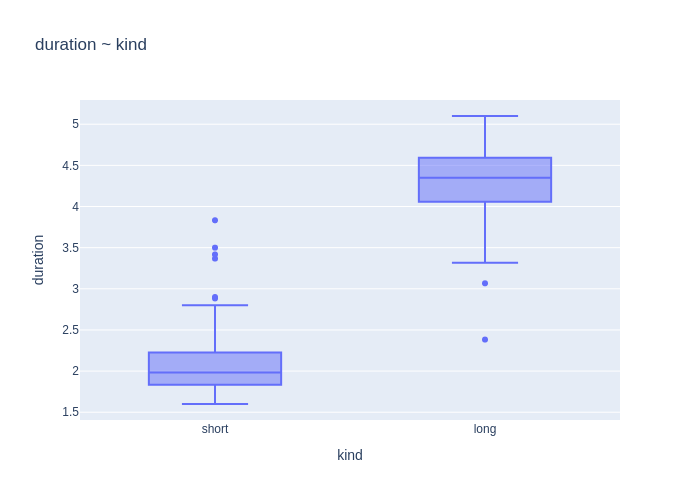

In [10]:
import plotly.express as px

# Create the box plot
fig = px.box(old_faithful, x='kind', y='duration', 
             title='duration ~ kind',
             category_orders={'kind': ['short', 'long']})

# Display the plot
fig.show(renderer="png")


This box plot will show the distribution of durations for both the "short" and "long" wait time categories. It helps visually assess the difference in durations between the two groups.

In summary, by using the kind variable with the Treatment contrast, you are simplifying the problem by explicitly modeling the **difference between two groups** rather than treating wait time as a continuous variable. This allows for a clearer interpretation and easier hypothesis testing regarding the impact of wait time length on the duration.

1. Original Model (Continuous Wait Time Variable):

In [19]:
smf.ols('duration ~ waiting', data=old_faithful)


What it does: This model treats the waiting variable as continuous, meaning it considers wait time as a numeric variable with a range of values. It tries to find a linear relationship between the waiting time and the duration of the eruption.
Interpretation: The model predicts how the duration changes as the waiting time increases, treating waiting time as a continuous measure. The coefficient for waiting shows the average change in duration for each unit increase in waiting time.

2. Subsetting the Data (Separate Models for "Short" and "Long" Wait Times)

What it does: Here, we divide the dataset into two subsets: one for "short" wait times (short_wait) and one for "long" wait times (long_wait). For each subset, we run a separate regression model.

Interpretation: By creating separate models, you’re examining the relationship between waiting and duration separately for "short" and "long" wait times. However, this approach doesn’t allow you to directly compare the two groups in a single model. You also lose the ability to account for potential differences in the relationship between waiting and duration across the two groups.

Downside: You end up fitting two models, and there’s no direct statistical comparison between the "short" and "long" categories.

3. New Model (Categorical Wait Time Variable with Indicator Variable):

What it does: This model treats the kind variable (which represents the "category" of wait time: "short" or "long") as a categorical variable using the C() function. The Treatment(reference="short") part specifies that "short" wait time is the reference group, meaning the model compares the "long" category to the "short" category.

Interpretation: The model estimates how the average duration differs between the "short" and "long" categories. The coefficient for "long" represents the difference in mean duration for "long" wait times compared to "short" wait times.

Advantage: This specification allows you to directly compare the two categories of wait times within a single model. You also get a clearer understanding of how the category of wait time (as opposed to individual waiting time values) influences the eruption duration.

Hypothesis Testing: You can perform a hypothesis test to determine if the difference between the two categories is statistically significant (i.e., whether the "long" group differs from the "short" group in terms of duration).

Big Picture Comparison:
Original Model: Treating waiting as a continuous variable gives a general relationship between waiting time and eruption duration. It doesn’t segment the data into groups but assumes a consistent linear relationship across all wait times.

Subsetting the Data: Creating separate models for "short" and "long" wait times isolates the two groups but requires running two models. It doesn't provide a direct comparison between the groups or allow for statistical inference about differences between them.

New Model with Indicator Variable: This model treats the wait times as distinct categories and uses the indicator variable to compare the groups within one model. It allows you to assess and test if the difference between "short" and "long" wait times is statistically significant. It’s more efficient than subsetting and better suited for hypothesis testing and comparison between the two groups.

Key Differences:
The original model looks at a general trend across all data, treating waiting time as continuous.
Subsetting the data focuses on specific groups but doesn't allow for a comparison across groups in one go.
The new categorical model with an indicator variable allows a direct comparison of the two categories ("short" and "long"), making it easier to test for significant differences between them and to interpret the effects more clearly.

**[Link to the ChatBot Session](https://chatgpt.com/share/672d4cdb-bbe0-800e-bb71-21aa562001e1)**

**Summary of the ChatBot Session**
Here's a summary of our exchanges in this session:

Wait Time Categorization and Model Specification:

You discussed categorizing wait times into "short" (wait time < 68) and "long" (wait time ≥ 68), and used this categorization for modeling purposes.
We reviewed the difference between previously considered models (smf.ols('duration ~ waiting', data=old_faithful[short_wait]) and smf.ols('duration ~ waiting', data=old_faithful[long_wait])) and the new model specification using an indicator variable for the "kind" category, with smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful).fit().
The new model treats the wait time categories ("short" and "long") as a categorical variable, allowing direct comparison between the two categories within a single model.
Big Picture Differences:

The previous models divided the dataset into subsets ("short" and "long"), while the new specification directly compares the two categories using an indicator variable in a single model.
The new model enables hypothesis testing on the difference in mean duration between the two groups, with the null hypothesis being "no difference" between the categories.
Hypothesis Testing:

The null hypothesis is that there is no difference between the "short" and "long" wait time groups in terms of duration.
We discussed using the p-value of the "long" coefficient from the model summary to assess whether to reject the null hypothesis.
Visualization:

You were provided with a box plot to visualize the distribution of durations for "short" and "long" wait time categories, using Plotly's px.box() function.
Instructions for Submission:

You were advised to use fig.show(renderer="png") for submissions on GitHub and MarkUs to ensure proper rendering of the plot.
This summary captures the key points of our discussion related to the analysis of wait time categories and the modeling approach.

Here's a summary of our interactions in this session:

Wait Time Categorization and Model Specification:

We discussed categorizing wait times into "short" (wait time < 68) and "long" (wait time ≥ 68) and using this categorization for a new model.
The new model specification uses an indicator variable for the kind category with smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful). This approach allows direct comparison of "short" and "long" categories within a single model.
Big Picture Differences Between Model Specifications:

We reviewed the key differences between:
The original model with continuous wait time (duration ~ waiting),
Separate models for "short" and "long" wait times by subsetting the data, and
The new model using an indicator variable to represent categorical wait time.
The new model simplifies comparing the two categories and enables hypothesis testing on the difference in mean duration between the groups.
Hypothesis Testing:

The null hypothesis states that there is no difference in mean duration between the "short" and "long" categories. We discussed interpreting the p-value of the "long" coefficient to determine whether to reject this null hypothesis.
Visualization:

You were given instructions to create a box plot to visualize duration differences between the two wait time categories using px.box() and were advised to use fig.show(renderer="png") for submissions on GitHub or MarkUs.
This summary captures the primary points of our discussion, focusing on the new model specification, comparison of models, hypothesis testing, and visualization.

## Question 12

To identify which histogram suggests the plausibility of the assumption that the distribution of error terms is normal, we need to visually assess the histograms of residuals for each model and compare them to the normal distribution curve added to each plot. Here’s the reasoning:

**1. Normality Assumption in Simple Linear Regression**: In simple linear regression, it’s assumed that the error terms (residuals) are normally distributed. This assumption can be checked by evaluating the shape of the residuals. If the residuals form a bell-shaped curve resembling a normal distribution, the normality assumption is likely met.

**2. Analysis of Each Model’s Residuals:**
- **Model 1: All Data using slope**: The histogram of residuals should ideally resemble a bell curve centered around zero. If it has a shape similar to the normal distribution curve, then it suggests the normality assumption holds.
- **Model 2: Short Wait Data**: The histogram may have fewer data points, so we must check for skewness or any outliers. A histogram that is highly skewed or has multiple peaks would suggest non-normality, as would a large discrepancy from the normal curve.
- **Model 3: Long Wait Data**: The distribution of residuals for this model might be different due to the specific nature of the data subset. Like Model 2, it should be assessed for any noticeable deviations from the bell-shaped curve. Skewness or irregularities in shape indicate non-normality.
- **Model 4: All Data using indicator**: With categorical predictors (like the `C(kind, Treatment(reference="short"))` term in the model), the residuals may show patterns or groupings that deviate from normality. A normal-shaped histogram would support the assumption, but deviations might occur due to the indicator variable's influence.

**3. Why the Other Models Might Not Support the Assumption**:
- **Model 2 (Short Wait Data)** may have skewed residuals or an irregular shape, suggesting the error terms are not normally distributed for this subset.
- **Model 3 (Long Wait Data)** may display multimodal distributions, indicating the residuals differ from a normal distribution.
- **Model 4 (All Data with indicator)** may show non-normality due to how categorical variables affect the residual distribution, especially if there's an uneven distribution between the groups.
**4. Conclusion**:
- The histogram that best matches the normal distribution curve (i.e., the residuals follow a bell-shaped curve and are symmetrically distributed around zero) is the one that supports the normality assumption for error terms in simple linear regression.
- The other histograms that show skewness, multimodality, or other irregular shapes suggest that the assumption of normality is not met for those models.

You can look at the histograms from the output of your code to compare the shapes visually, but the key indicator of normality will be how closely the residuals match the overlaid normal distribution curve.

**[Link to the ChatBot Session](https://chatgpt.com/share/672d53a7-0bd0-800e-99be-d217dd7cf05b)**

**Summary of the ChatBot Session**
Here's a summary of our exchanges in this session:

Histogram Analysis of Residuals: You shared a code snippet for generating histograms of residuals from different models, using the plotly library, to assess whether the error terms follow a normal distribution. You asked for help identifying which histogram supports the normality assumption and why the others do not. I explained that the normality of residuals in simple linear regression is assessed by checking the shape of their distribution, ideally resembling a bell-shaped curve. I outlined the potential issues in Models 2, 3, and 4 that may violate the normality assumption, including skewness, multimodal distributions, and the influence of categorical variables.
This summary captures our discussion on analyzing the residuals' normality assumption in regression models. Let me know if you need further details!

## Question 13

### (A) Permutation Test (Shuffling the Labels)
A permutation test works by shuffling the labels of the groups and recalculating the statistic of interest (in this case, the difference in means) many times. This allows us to simulate the distribution of the test statistic under the null hypothesis, which assumes that there is no difference between the two groups.

**1. Shuffling Step**: We shuffle the labels of one of the groups, effectively creating a random reassignment of the data points to the groups.

For example, in the code snippet provided

In [ ]:
old_faithful.assign(kind_shuffled=old_faithful['kind'].sample(n=len(old_faithful), replace=False).values)

This shuffles the 'kind' column so that the values are randomly reassigned to the 'kind_shuffled' column, breaking any inherent group structure.

**2. Calculating the Test Statistic**: Once the labels are shuffled, we calculate the mean of the two groups and their difference in means. This is repeated many times (e.g., 10,000 permutations) to generate a distribution of the difference in means under the null hypothesis. We then compare the observed statistic (i.e., the actual difference in means between the unshuffled groups) to this permutation distribution.

For example, after shuffling, the mean difference is calculated as

In [ ]:
old_faithful.groupby('kind_shuffled')['duration'].mean().iloc[::-1].diff().values[1]


This compares the mean durations for the shuffled 'kind_shuffled' groups.

**3. Interpretation**: The p-value is determined by how often the permuted differences in means are as extreme or more extreme than the observed difference. If the observed difference is in the tails of the permutation distribution, it suggests that the null hypothesis is unlikely and there is a significant difference between the groups.


### (B) Bootstrap Confidence Interval


A bootstrap procedure generates a large number of resampled datasets (with replacement) from each of the two groups and calculates the difference in means for each sample. The collection of these bootstrapped differences in means is then used to construct a confidence interval.

**1. Bootstrapping Step**: In the provided code:

In [ ]:
old_faithful.groupby('kind').apply(lambda x: x.sample(n=len(x), replace=True)).reset_index(drop=True)


This samples with replacement from each group ('kind') to create a new bootstrap sample of the same size as the original group.

**2. Calculating the Test Statistic**: The mean difference between the two groups is then calculated for each bootstrapped sample:

In [ ]:
old_faithful.groupby('kind')['duration'].mean().iloc[::-1].diff().values[1]

This is done repeatedly (e.g., 10,000 bootstraps) to obtain a distribution of the difference in means under the assumption that the groups' distributions are similar to the original sample.

**3. Confidence Interval**: After obtaining the bootstrapped differences, a 95% confidence interval is constructed by taking the 2.5th and 97.5th percentiles of the bootstrapped differences:

In [ ]:
np.quantile(bootstrapped_mean_differences, [0.025, 0.975])


This gives us the range within which we expect the true population difference in means to lie, with 95% confidence.

### (a) Explanation of Sampling Approaches

**1. Permutation Test**: The permutation test focuses on testing the null hypothesis by reassigning the data points randomly to different groups and recalculating the statistic. This is done by permuting the group labels without assuming any specific structure about the data.

**2. Bootstrap Confidence Interval**: The bootstrap method, on the other hand, focuses on estimating the uncertainty of the sample statistic by resampling with replacement from the original data. It does not assume that the groups must be of equal size or follow any specific distribution, making it a more flexible method.

### (b) Comparison to Indicator Variable Model Approach

In Question 10, an indicator variable-based model was used, likely for hypothesis testing based on a regression model with a binary indicator variable that represents group membership (e.g., 1 for one group, 0 for the other). The comparison to this model can be summarized as follows:

**1. Similarity**:

- Both methods (permutation and bootstrap) involve resampling techniques to assess statistical significance or uncertainty.
- The indicator variable model approach could also assess differences between groups by using an indicator to compare means or other parameters.

**2. Difference**:
- The indicator variable model typically assumes a parametric structure (e.g., linear regression), whereas the permutation and bootstrap methods are non-parametric and do not rely on assumptions about the underlying distributions of the groups.
- The permutation test shuffles the labels of the data to create a distribution of possible differences under the null hypothesis, while the bootstrap method creates new datasets by resampling the data within each group to estimate the distribution of the difference in means.
- The indicator variable model might directly estimate a p-value from the model's output, while the permutation and bootstrap methods rely on empirical distributions generated through simulations.

In summary, permutation and bootstrap methods are more flexible and do not require assumptions about the underlying distributions, while the indicator variable model approach relies on a specific parametric model for hypothesis testing.

**[Link to the ChatBot Session](https://chatgpt.com/share/672d5f7d-402c-800e-a797-0a3863567e82)**

**Summary of the ChatBot Session**

Here's a summary of our exchanges in this session:

Assignment Guidance: You asked for help on a hypothesis testing assignment, where you are comparing two sample groups (e.g., "short" and "long" wait times). I provided detailed explanations on how to perform a permutation test and bootstrap confidence interval for comparing the means of the two groups. I also explained how the sampling approaches work for these simulations.

Methods Explanation: I outlined the key steps for conducting a permutation test, which involves shuffling labels and recalculating the test statistic repeatedly to build a distribution under the null hypothesis. I also explained the bootstrap procedure, which involves resampling within each group with replacement to generate a distribution of differences in means, from which a confidence interval is constructed.

Comparison with Indicator Variable Model: You asked for a comparison between the permutation and bootstrap methods and the indicator variable-based model approach used in a previous question. I highlighted the similarities and differences between these approaches, noting that both the permutation and bootstrap methods are non-parametric and more flexible, whereas the indicator variable model relies on a parametric structure (e.g., linear regression) and typically involves hypothesis testing with specific assumptions.

I hope this summary meets your needs for your homework assignment! Let me know if you'd like further clarification.








## Question 14

Yes